<a href="https://colab.research.google.com/github/steven1174/Data_Science_Handbook/blob/main/08.Customizing_Plot_Legends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customizing Plot Legends

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('classic')

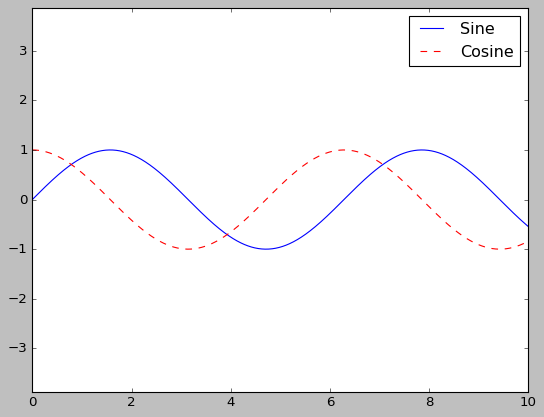

In [4]:
x = np.linspace(0,10,1000)
fig, ax = plt.subplots()

ax.plot(x,np.sin(x),'-b',label='Sine')
ax.plot(x,np.cos(x),'--r',label='Cosine')

ax.axis('equal')
ax.legend()

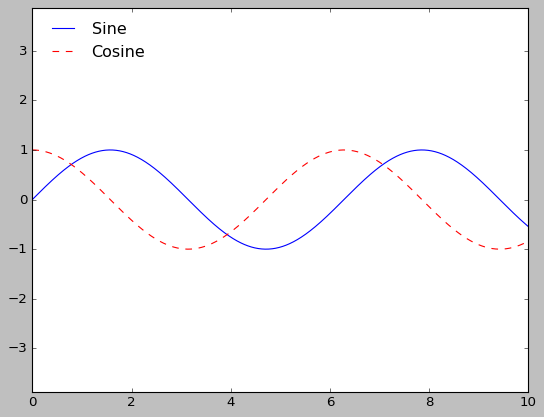

In [5]:
ax.legend(loc='upper left', frameon=False)
fig

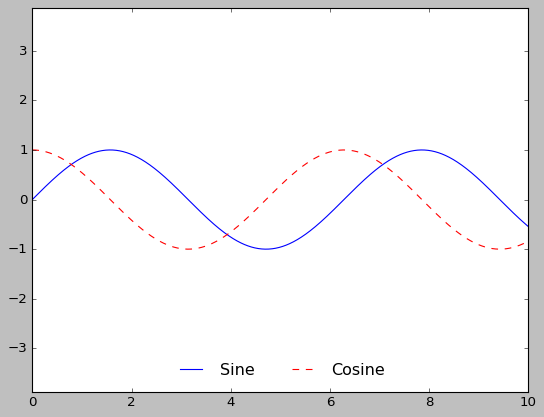

In [6]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

A *rounded box* (fancybox), a *shadow*, an *alpha* value or the *padding* around the text can be used:

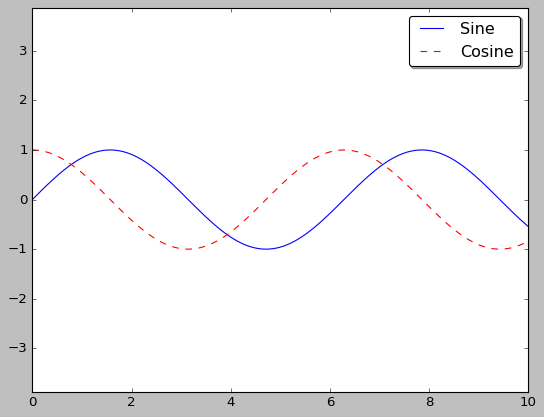

In [13]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad= 0.4)
fig

## Choosing Elements for the Legend

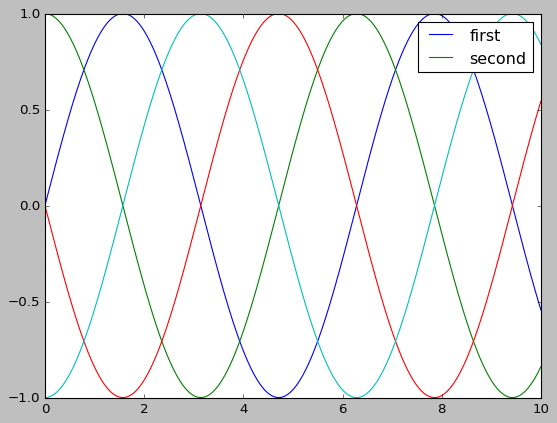

In [8]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

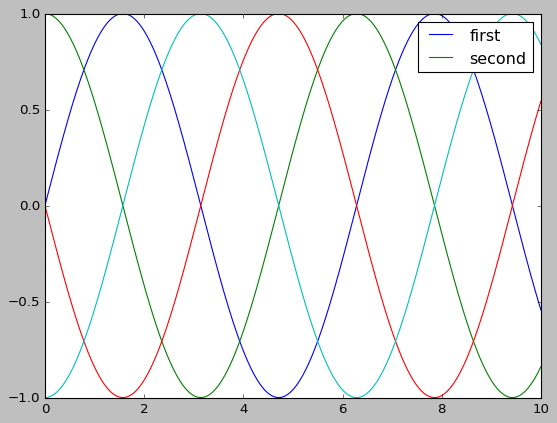

In [9]:
plt.plot(x, y[:,0 ], label='first')
plt.plot(x, y[:,1 ], label='second')
plt.plot(x, y[:,2:])

plt.legend(framealpha=1, frameon=True)

## Legend for Size of Points

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


Text(0.5, 1.0, 'California Cities: Area and Population')

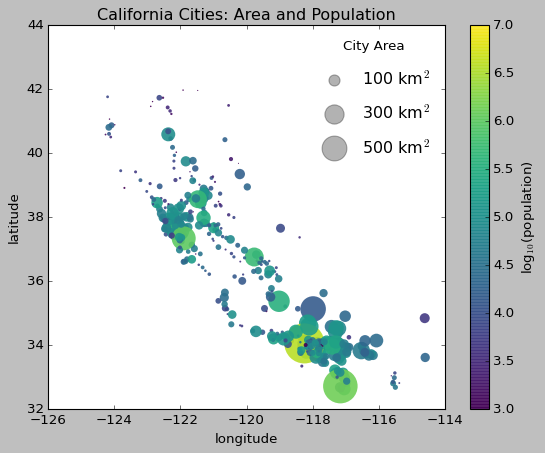

In [15]:
import pandas as pd

url = 'https://raw.githubusercontent.com/steven1174/Data_Science_Handbook/main/Data/california_cities.csv'
cities = pd.read_csv(url)
cities.drop(['Unnamed: 0'], axis = 1, inplace= True)

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, 
            label= None,
            c= np.log10(population),
            cmap='viridis',
            s = area,
            linewidth=0,
            alpha=0.9)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend: we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
  plt.scatter([], [], c='k', alpha=0.3, s=area,
              label=str(area) + ' km$^2$')

plt.legend(scatterpoints=1, 
           frameon=False,
           labelspacing=1, 
           title='City Area')
plt.title('California Cities: Area and Population')

## Multiple Legends

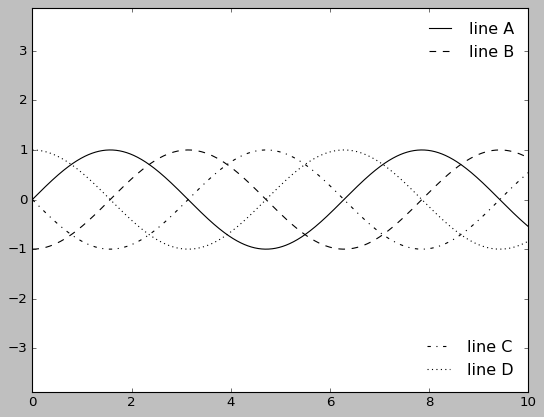

In [29]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()

lines = []
styles = ['-','--','-.',':']

for i in range(4):
  lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')

ax.axis('equal')

# Specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right', frameon=False)

# Create the second legend and add the artist manually
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
loc='lower right', frameon=False)
ax.add_artist(leg)